In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import requests
import datetime
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
import plotly.offline as py
import plotly
from plotly.offline import init_notebook_mode
from plotly import graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pywt

print(f"exercício 3 lista 4\n"
      f"MAE5871\n"
      f"Análise espectral de séries temporais\n"
      f"Professora Chang\n")

def plot_coefficients(coeff_d, color):
    print(f"coefficients = {coeff_d}")
    x = np.arange(len(coeff_d))

    fig, ax = plt.subplots()
    ax.set_title("Value x Coefficients", fontsize=14)
    plt.bar(x, coeff_d, width=0.1, color=color)
    plt.xticks(x, [f'{i}' for i in range(len(coeff_d))])
    plt.show()

exercício 3 lista 4
MAE5871
Análise espectral de séries temporais
Professora Chang



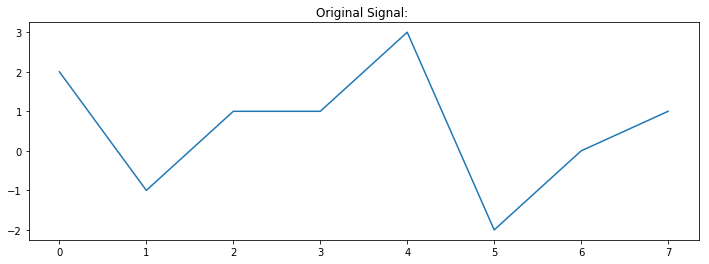

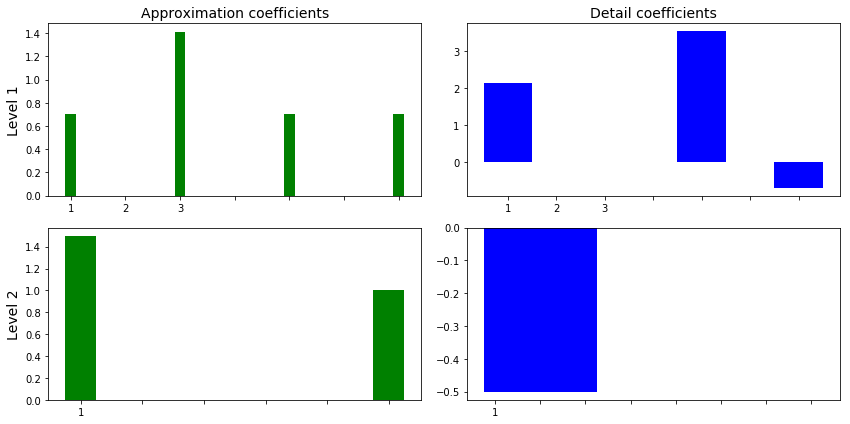

In [44]:
# wavefun(level=5) é o parâmetro para o nível de refinamento baseado nos "filter coefficients"
# referência: https://pywavelets.readthedocs.io/en/latest/regression/wavelet.html#and-now-the-wavefun
# escolhi 5 para uma boa visualização do gráfico

#ondaleta de haar
wavelet_haar = pywt.Wavelet('haar')
level = 2
[phi, psi, x] = wavelet_haar.wavefun(level=level)
data = [go.Scatter(x=x, y=psi, mode='lines', name="haar psi")]
data += [go.Scatter(x=x, y=phi, mode='lines', name="haar phi")]
layout = go.Layout(
    title='Wavelets',
    xaxis={'title':'x'},
    yaxis={'title':'y'}
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


vetor_do_enunciado = [2,-1,1,1,3,-2,0,1]

import pywt

signal = vetor_do_enunciado
    
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title("Original Signal: ")
ax.plot(signal)
plt.show()
    
data = signal
waveletname = 'haar'
 
fig, axarr = plt.subplots(nrows=level, ncols=2, figsize=(6*level,6))
for ii in range(level):
    (data, coeff_d) = pywt.dwt(data, waveletname)
#     axarr[ii, 0].bar(data[0], data[1], width=0.2, color='r')
    axarr[ii, 0].bar(range(len(data)), data, width=0.1, color='g')
    axarr[ii, 1].bar(range(len(coeff_d)), coeff_d, width=0.5, color='b')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_xticklabels(range(len(data)))
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_xticklabels(range(len(coeff_d)))
plt.tight_layout()
plt.show()